# This is the Jupyter/IPython notebook you will complete for the final exam

**Please remember that this is an open-book, open-notes (but not open-internet or open-homework!) exam. So, that means you can look at the Jupyter/IPython notebooks we developed in class. Those are online, and linked on the Moodle page.**

You can do this on your own laptop, or you can do it on Google CoLab.

First things first, our standard imports:

In [1]:
import numpy as np, scipy as sp, seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed

Matplotlib is building the font cache; this may take a moment.


Now, for the first problem, let's make sure we know what we're plotting. The initial conditions tell us that we have perfume from $0<x<l/2$. I'll pick $l=10$ but you can change it if you'd like.

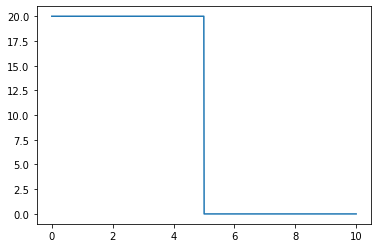

In [2]:
ell = 10
x = np.linspace(0,ell,1000)
y = np.zeros_like(x)
y[x<ell/2] = 20

y_exact = y

plt.plot(x,y)

Now it's time to plot the Fourier series you got. It's possible that you'll have different answers for even and odd terms.

In [3]:
def isodd(n):
    return divmod(n,2)[1] == 1
def iseven(n):
    return divmod(n,2)[1] == 0
for i in range(10):
    print(i,isodd(i),iseven(i))

0 False True
1 True False
2 False True
3 True False
4 False True
5 True False
6 False True
7 True False
8 False True
9 True False


## And you get your choice as to whether you're going to solve for the $a_n$'s and $b_n$'s or the $c_n$'s. So, you just need to do it one of those ways!

Here are some formulas you may end up finding useful:

If you want a series that goes like $1,-1,1,-1,1,-1$, you want

```python
((-1)**(n+1))
```

If you want a series that goes like that for the odd terms, but is 0 for the even terms, you want

```python
((-1)**((n-1)/2))
```
for the odd terms, and zero for the even terms.

If you want a series like that for for the even terms, but zero for the odd terms, you want

```python
((-1)**((n)/2))
```

for the even terms and zero for the odd terms.

And ... if all of this just leads to tons of confusion, you can earn almost full credit for just defining the first several terms explicitly. Instead of the generic `a(n)` and `b(n)` below, if you knew that the first few $a_n$ terms were $1,-1,1/2,-1/3$ (they aren't), you could define `a(n)` as below, which would just do those:

```python
def a(n):
    if n == 0:
        return 1
    elif n == 1:
        return -1
    elif n == 2:
        return 1/2
    elif n == 3:
        return -1/3
    else:
        return 0
```


## Solving for the $a_n$'s and $b_n$'s

* I've put in values for all of the possibilities (even and odd $a_n$ and $b_n$) ... you may want to set several of those to zero, and you almost surely want to change whatever I've written below to match up with your answers from pencil and paper.
* If you want to change the limits of the plot, use the `plt.ylim` line at the bottom

In [4]:
def a(n):
    if n == 0:
        return 2
    elif isodd(n):
        return 10*(-1)**((n-1)/2)/n
    elif iseven(n):
        return 10*(-1)**((n)/2)/n
def b(n):
    if isodd(n):
        return 1/n
    elif iseven(n):
        return 1/n**2
def plotseries(N=0):
    y = np.zeros_like(x)
    for n in range(0,N+1):
        if n == 0:
            this_term = (1/2)*a(0)
        else:
            this_term =  a(n)*np.cos(n*np.pi*x/ell)
            this_term += b(n)*np.sin(n*np.pi*x/ell)
        y = y + this_term
    plt.plot(x,y,label=f'Series for the first {N} terms')
    plt.plot(x,y_exact,'k--',label='Exact solution')
    plt.ylim(-25,25)
    plt.legend()
interact(plotseries,N=(0,50))

interactive(children=(IntSlider(value=0, description='N', max=50), Output()), _dom_classes=('widget-interact',…

<function __main__.plotseries(N=0)>

## Solving for the $c_n$'s

If you want to solve using the $c_n$'s, look at the above comments for hints on how to get the combinations of 1,-1,1,-1, etc. that you're looking for ... or for how to write code if you've just figured out the first several terms on paper.

As with the $a_n$'s and $b_n$'s above, please note that 

* I've put in values for all of the possibilities (even and odd) ... you may want to set some of those to zero, and you may want to change any or all of these to match what you got with pencil and paper.
* If you want to change the limits of the plot, use the `plt.ylim` line at the bottom

In [5]:
def c(n):
    if n == 0:
        return 10
    elif isodd(n):
        return 5*(-1)/(1j *n*np.pi)
    elif iseven(n):
        return 5*(-1)/(1j *n*np.pi)

def plotseries(N=0):
    y = np.zeros_like(x)
    for n in range(0,N+1):
        if n == 0:
            this_term = c(0) + np.zeros_like(x)
        else:
            this_term  = c( n)*np.exp(1j *  n * np.pi * x / (.5*ell))
            this_term += c(-n)*np.exp(1j *(-n)* np.pi * x / (.5*ell))
            this_term = np.real(this_term)
        y += this_term

    plt.plot(x,y,label=f'Series for the first {N} terms')
    plt.plot(x,y_exact,'k--',label='Exact solution')
    plt.ylim(-25,25)
    plt.legend()
interact(plotseries,N=(0,50))

interactive(children=(IntSlider(value=0, description='N', max=50), Output()), _dom_classes=('widget-interact',…

<function __main__.plotseries(N=0)>

## The time-evolution

This part is extra credit. You'll want to copy and paste your solution from above, and then modify all of the `this_term =` or `this_term +=` terms. This time, in addition to the spatial part you have above, you'll want to multiply by whatever your solution for $T(t)$ turns out to be. Again, don't forget that you can get significant partial credit by drawing pictures and describing what you expect teh result to be.